In [1]:
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib
matplotlib.style.use('ggplot')

### Arizona Analysis

In [3]:
az_df = pd.read_csv('../../data/az_df.csv', index_col=0)

/Users/simon.frid/.virtualenvs/lovely-django/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (71,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
a = pd.crosstab(az_df['city'], az_df['mlsAgentID']).T
ac = ((a > 0).sum(axis=1).value_counts(normalize=True)*100).cumsum()

o = pd.crosstab(az_df['city'], az_df['mlsOfficeID']).T
oc = ((o > 0).sum(axis=1).value_counts(normalize=True)*100).cumsum()#.plot()

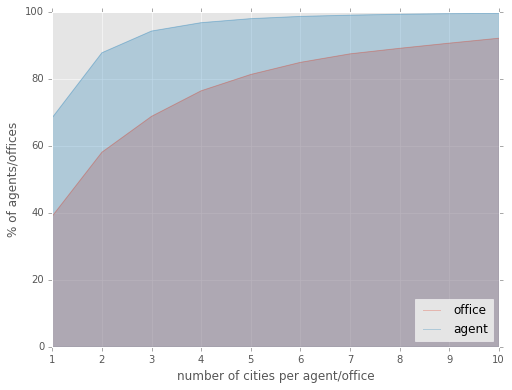

In [58]:
oc.ix[:10].plot(kind='area', label='office', figsize=(8, 6), alpha=.3)
ac.ix[:10].plot(kind='area', label='agent', alpha=.3)
plt.ylabel('% of agents/offices')
plt.xlabel('number of cities per agent/office')
plt.legend(loc='lower right')

In [22]:
p_df = az_df[az_df['city'] == 'Phoenix']

In [27]:
len(p_df.mlsAgentID.value_counts())

7016

In [73]:
import numpy as np

In [84]:
num_listings = pd.crosstab(az_df['city'], az_df['status'])

In [85]:
num_agents = pd.crosstab(
    az_df['city'], az_df['status'],
    values=az_df['mlsAgentID'], aggfunc=lambda x:len(set(x) )).fillna(0)

In [104]:
(num_listings/num_agents).fillna(0).sort('Active', ascending=False)

/Users/simon.frid/.virtualenvs/lovely-django/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


status,Active,Cancelled,Closed,Expired,Pending,Temp Off Market
city,,,,,,
Hackberry,5.000000,0.0,0.000000,0,0,0
Overgaard,4.585366,1.0,1.285714,0,1,0
Crown King,4.500000,0.0,1.000000,0,1,0
Young,4.285714,0.0,1.000000,0,2,0
Seligman,3.666667,0.0,0.000000,0,0,0
Pinetop,3.550000,1.0,2.000000,0,1,0
Bisbee,3.250000,0.0,1.000000,0,0,0
Flagstaff,3.056338,1.0,1.750000,0,1,0
Golden Valley,3.000000,0.0,0.000000,0,0,0


In [105]:
buildzoom_d = {
    'Phoenix': 14886 ,
    'Scottsdale': 5895 , 
    'Mesa': 5692,
    'Gilbert':  2905,
    'Chandler': 2432,
    'Glendale': 3104 ,           
    'Surprise': 938   ,         
    'Peoria':  1846    ,          
    'Queen Creek': 1100 ,        
    'Goodyear': 486      ,      
    'Buckeye': 459        ,      
    'Maricopa': 261        ,     
    'Tempe': 2300           ,     
    'San Tan Valley': 59     ,
    }

In [106]:
buildzoom_d

{'Buckeye': 459,
 'Chandler': 2432,
 'Gilbert': 2905,
 'Glendale': 3104,
 'Goodyear': 486,
 'Maricopa': 261,
 'Mesa': 5692,
 'Peoria': 1846,
 'Phoenix': 14886,
 'Queen Creek': 1100,
 'San Tan Valley': 59,
 'Scottsdale': 5895,
 'Surprise': 938,
 'Tempe': 2300}

In [ ]:
buildzoom_d